# Multiple Linear Regression

Objective: Predicting concrete strength  
Dataset: compresive_strength_concrete.csv  
Ref: NA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

train = pd.read_csv("compresive_strength_concrete.csv")
print('Train dataset', train.shape)
train.head()

Train dataset (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
#Renaming the Columns
train.columns = ['cement', 'furnace_slag', 'flay_ash',   
                'water', 'superplasticizer',  
                'coarse_agg', 'fine_agg', 'age_day',   
                'concrete_strength']
train.head()

,cement,furnace_slag,flay_ash,water,superplasticizer,coarse_agg,fine_agg,age_day,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
concrete_strength,0,0.0
age_day,0,0.0
fine_agg,0,0.0
coarse_agg,0,0.0
superplasticizer,0,0.0
water,0,0.0
flay_ash,0,0.0
furnace_slag,0,0.0
cement,0,0.0


## Correlation

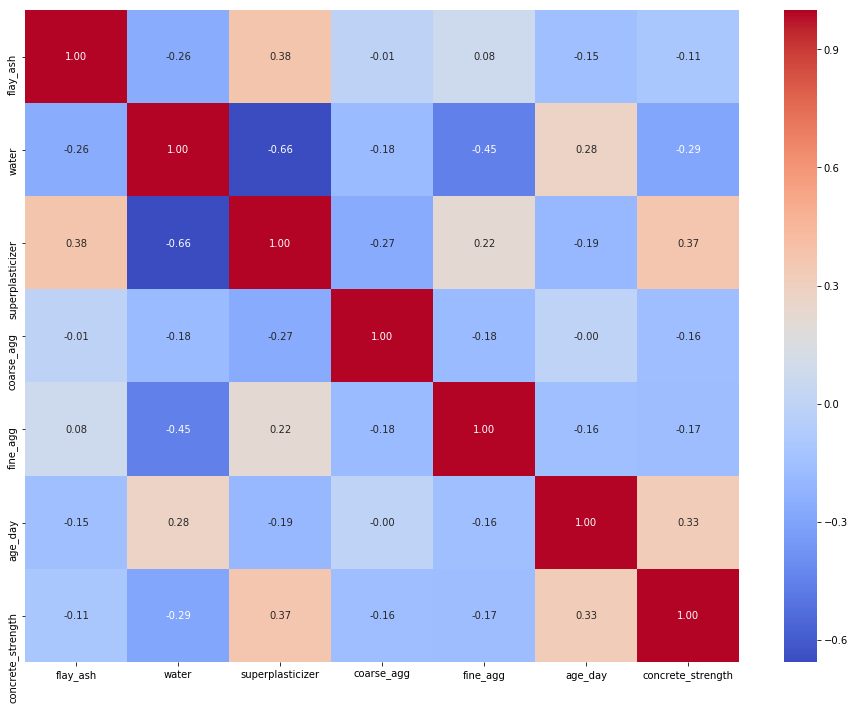

In [5]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=train.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = train.corr()
corr_rank["concrete_strength"].sort_values(ascending=False)

concrete_strength    1.000000
cement               0.497832
superplasticizer     0.366079
age_day              0.328873
furnace_slag         0.134829
flay_ash            -0.105755
coarse_agg          -0.164935
fine_agg            -0.167241
water               -0.289633
Name: concrete_strength, dtype: float64

## Modelling

In [8]:
from sklearn import linear_model
X = train[['cement','superplasticizer','age_day','furnace_slag']]
y = train['concrete_strength']
X_test = train[['cement','superplasticizer','age_day','furnace_slag']]

regr = linear_model.LinearRegression()
regr.fit(X, y)

#print('Intercept: \n', regr.intercept_)
print('Intercept   : ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('Model accuracy score:', round(regr.score(X,y)*100,2))

Intercept   :  -2.0142273662658283
Coefficients:  [0.08118837 1.05998343 0.09849671 0.05318598]
Model accuracy score: 55.11


## Prediction

In [9]:
y_test=regr.predict(X_test)

concrete_pred = pd.DataFrame({'ConcreteStrength Prediction':y_test}).round(2)
print(concrete_pred.shape)

(1030, 1)


In [10]:
result = train.join(concrete_pred, how='outer')
result.head()

,cement,furnace_slag,flay_ash,water,superplasticizer,coarse_agg,fine_agg,age_day,concrete_strength,ConcreteStrength Prediction
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,47.24
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,47.24
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,59.15
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,68.51
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,56.61


## Conclusion

Based on result table, we can see that with prediction accuracy score only 55%, the prediction is way from accurate with the real data.